In [34]:
import numpy as np

def normalize(X):
    return (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8)



In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (-1/m) * (np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)))

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y.reshape(-1,1))
        theta -= alpha * gradient  # Convert to (4,) shape
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


In [36]:
import pandas as pd

df_x=pd.read_csv('logisticX.csv')
df_y=pd.read_csv('logisticY.csv')

df_x.shape

(99, 2)

In [37]:
df_y.shape

(99, 1)

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2)

X_train.shape

(79, 2)

In [39]:
X_test.shape

(20, 2)

In [40]:
y_train = y_train.to_numpy().reshape(-1, 1)


In [41]:
# Assuming X_train and y_train are the training data
X_train = normalize(X_train)  # Normalize the data
X_train = np.c_[np.ones(X_train.shape[0]), X_train]  # Add intercept term

theta_initial = np.zeros((X_train.shape[1], 1))

alpha = 0.1
iterations = 1000
theta_optimal, cost_history = gradient_descent(X_train, y_train, theta_initial, alpha, iterations)

# Cost function value after convergence
print(f"Cost after convergence: {cost_history[-1]}")


Cost after convergence: 0.22890012400798418


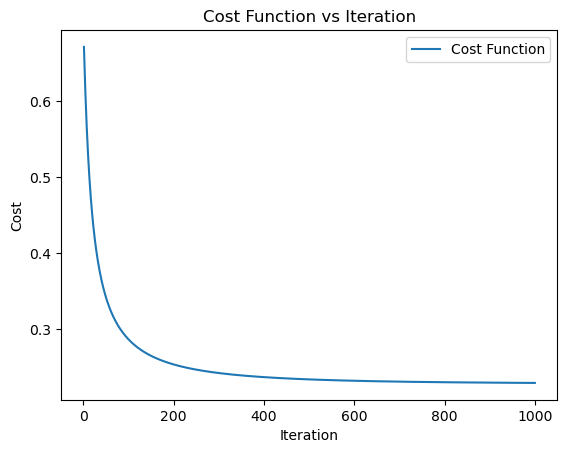

In [45]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cost_history) + 1), cost_history, label="Cost Function")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()


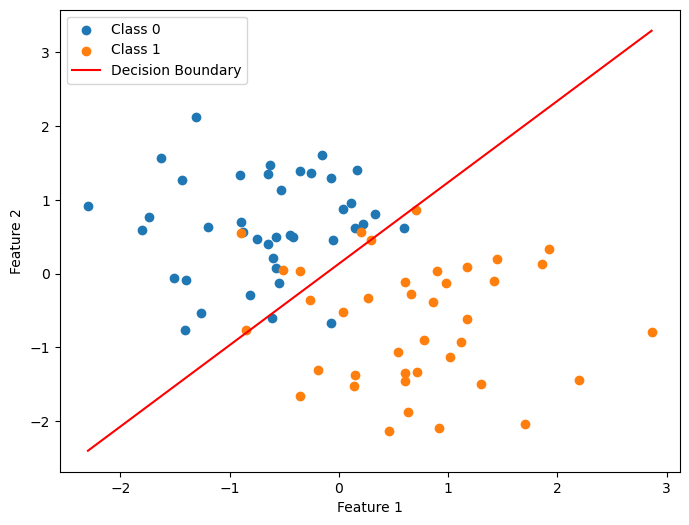

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))

    # Ensure y is a 1D array
    y = y.ravel()

    # Plot data points with different colors for each class
    for label in np.unique(y):
        plt.scatter(X[y == label, 1], X[y == label, 2], label=f"Class {label}")

    # Decision boundary
    x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    y_values = -(theta[0] + theta[1] * x_values) / theta[2]  # Fix applied

    plt.plot(x_values, y_values, label="Decision Boundary", color="red")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, theta_optimal)


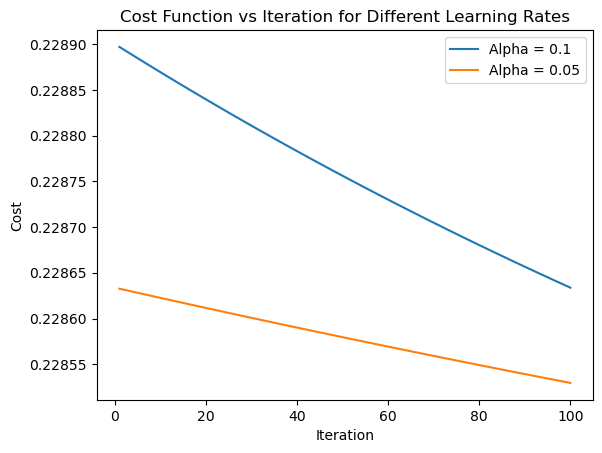

In [47]:
alpha1 = 0.1
alpha2 = 0.05

# Train model with alpha = 0.1
theta1, cost_history1 = gradient_descent(X_train, y_train, theta_initial, alpha1, 100)

# Train model with alpha = 0.05
theta2, cost_history2 = gradient_descent(X_train, y_train, theta_initial, alpha2, 100)

# Plot cost function vs iteration for both learning rates
plt.plot(range(1, len(cost_history1) + 1), cost_history1, label="Alpha = 0.1")
plt.plot(range(1, len(cost_history2) + 1), cost_history2, label="Alpha = 0.05")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict the labels using the trained model
predictions = sigmoid(X_train.dot(theta_optimal)) >= 0.5

# Compute confusion matrix
cm = confusion_matrix(y_train, predictions)
accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Confusion Matrix:
[[37  3]
 [ 5 34]]
Accuracy: 0.8987341772151899
Precision: 0.918918918918919
Recall: 0.8717948717948718
F1 Score: 0.8947368421052632
